# K Means Clustering with Python

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster and finds the centroid of each cluster. Then, the algorithm iterates through two steps:
Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.


## Import Libraries


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

** Read in the Mall_Customers.csv file using read_csv.**

In [22]:
dataset = pd.read_csv('Mall_Customers.csv')
#X = dataset.iloc[:, [3, 4]].values
X=dataset

## Data Cleaning and EDA


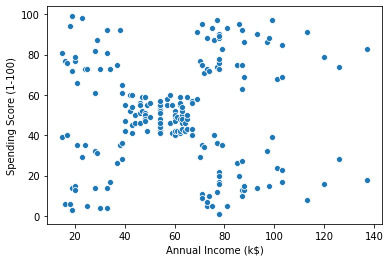

In [23]:
dataset.drop(['CustomerID','Genre','Age'], axis=1,inplace=True)
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=X)


## Using the elbow method to find the optimal number of clusters

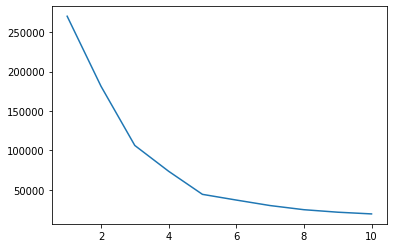

In [24]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.show()

## Fitting K-Means to the dataset

In [41]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [42]:
X['clusters']=y_kmeans
X

,Annual Income (k$),Spending Score (1-100),clusters
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
...,...,...,...
195,120,79,4
196,126,28,1
197,126,74,4
198,137,18,1


## Visualising the clusters

In [43]:
kmeans.cluster_centers_

array([[ 5.52962963e+01,  4.95185185e+01, -4.44089210e-16],
       [ 8.82000000e+01,  1.71142857e+01,  1.00000000e+00],
       [ 2.63043478e+01,  2.09130435e+01,  2.00000000e+00],
       [ 2.57272727e+01,  7.93636364e+01,  3.00000000e+00],
       [ 8.65384615e+01,  8.21282051e+01,  4.00000000e+00]])

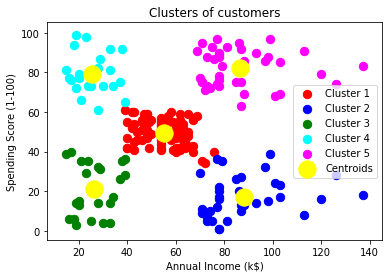

In [45]:
plt.scatter(X.values[y_kmeans == 0, 0], X.values[y_kmeans == 0, 1], s = 70, c = 'red', label = 'Cluster 1')
plt.scatter(X.values[y_kmeans == 1, 0], X.values[y_kmeans == 1, 1], s = 70, c = 'blue', label = 'Cluster 2')
plt.scatter(X.values[y_kmeans == 2, 0], X.values[y_kmeans == 2, 1], s = 70, c = 'green', label = 'Cluster 3')
plt.scatter(X.values[y_kmeans == 3, 0], X.values[y_kmeans == 3, 1], s = 70, c = 'cyan', label = 'Cluster 4')
plt.scatter(X.values[y_kmeans == 4, 0], X.values[y_kmeans == 4, 1], s = 70, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()